# Project: Twitter Sentiment Analysis on Current Events

## Objective:
To perform sentiment analysis on tweets collected for trending topics and visualize public opinion.

## Tools Used:
- Python
- Pandas
- TextBlob
- Matplotlib / Seaborn
- WordCloud
- Jupyter Notebook


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [11]:
import pandas as pd  # Import the pandas library

# Load the dataset
df = pd.read_csv('../data/tweets.csv')

# Display the first 5 rows of the data
df.head()


,text
0,I love the new features of ChatGPT! Amazing up...
1,Disappointed with the current political scenar...
2,Can't wait for the next IPL season to start!
3,AI is revolutionizing everything. Super cool s...
4,"Terrible service by the airline, never flying ..."


In [12]:
# Get information about the structure of the dataset
df.info()

# How many rows and columns are there?
print("Shape:", df.shape)

# All column names
print("Columns:", df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10 non-null     object
dtypes: object(1)
memory usage: 212.0+ bytes
Shape: (10, 1)
Columns: Index(['text'], dtype='object')


In [13]:
# Count the number of null (missing) values in each column
print("🔍 Null values:\n", df.isnull().sum())

# Remove rows with any null values (if any exist)
df = df.dropna()

# Count the number of duplicate rows in the dataset
print("🧾 Duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Check the shape of the cleaned dataset
print("📊 Cleaned Data Shape:", df.shape)


🔍 Null values:
 text    0
dtype: int64
🧾 Duplicate rows: 0
📊 Cleaned Data Shape: (10, 1)


In [14]:
# Show only the 'text' column of the tweets (first 10 rows)
df['text'].head(10)


0    I love the new features of ChatGPT! Amazing up...
1    Disappointed with the current political scenar...
2         Can't wait for the next IPL season to start!
3    AI is revolutionizing everything. Super cool s...
4    Terrible service by the airline, never flying ...
5    Neutral about the new budget, nothing impressive.
6            The movie Kalki 2898 AD was mind-blowing!
7              Traffic is the worst today 😡 #Ahmedabad
8         Modi's speech was inspiring, truly a leader.
9          I don't care about cricket much these days.
Name: text, dtype: object

In [15]:
# Save the cleaned data into a new CSV file
df.to_csv('../data/cleaned_tweets.csv', index=False)

print("✅ Cleaned dataset saved as cleaned_tweets.csv")


✅ Cleaned dataset saved as cleaned_tweets.csv


In [16]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\YUG
[nltk_data]     JASOLIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download NLTK resources if running for the first time
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\YUG
[nltk_data]     JASOLIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Get the list of stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 1. Convert text to lowercase
    text = text.lower()
    
    # 2. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    # 3. Remove mentions (@user) and hashtags (#hashtag)
    text = re.sub(r'\@\w+|\#', '', text)
    
    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # 5. Remove digits (optional step)
    text = re.sub(r'\d+', '', text)
    
    # 6. Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    
    # 7. Join the cleaned words back into a sentence
    cleaned_text = " ".join(tokens)
    
    return cleaned_text


In [19]:
# Apply the clean_text function to each tweet and create a new column for cleaned text
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the first 5 rows showing both original and cleaned text
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,I love the new features of ChatGPT! Amazing up...,love new features chatgpt amazing update
1,Disappointed with the current political scenar...,disappointed current political scenario india
2,Can't wait for the next IPL season to start!,cant wait next ipl season start
3,AI is revolutionizing everything. Super cool s...,ai revolutionizing everything super cool stuff
4,"Terrible service by the airline, never flying ...",terrible service airline never flying


In [20]:
df.to_csv('../data/cleaned_tweets_final.csv', index=False)
print("✅ Final cleaned CSV saved.")


✅ Final cleaned CSV saved.


In [21]:
from textblob import TextBlob


In [22]:
# Function to extract polarity (sentiment score)
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to extract subjectivity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


In [23]:
# Create a new column for polarity by applying the get_polarity function
df['polarity'] = df['cleaned_text'].apply(get_polarity)

# Create a new column for subjectivity by applying the get_subjectivity function
df['subjectivity'] = df['cleaned_text'].apply(get_subjectivity)


In [24]:
# Function to determine sentiment label from polarity score
def get_sentiment_label(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Create a new column for sentiment label
df['sentiment'] = df['polarity'].apply(get_sentiment_label)


In [25]:
# View the first 10 rows with selected columns
df[['text', 'cleaned_text', 'polarity', 'subjectivity', 'sentiment']].head(10)


,text,cleaned_text,polarity,subjectivity,sentiment
0,I love the new features of ChatGPT! Amazing up...,love new features chatgpt amazing update,0.412121,0.651515,Positive
1,Disappointed with the current political scenar...,disappointed current political scenario india,-0.250000,0.416667,Negative
2,Can't wait for the next IPL season to start!,cant wait next ipl season start,0.000000,0.000000,Neutral
3,AI is revolutionizing everything. Super cool s...,ai revolutionizing everything super cool stuff,0.341667,0.658333,Positive
4,"Terrible service by the airline, never flying ...",terrible service airline never flying,-1.000000,1.000000,Negative
5,"Neutral about the new budget, nothing impressive.",neutral new budget nothing impressive,0.568182,0.727273,Positive
6,The movie Kalki 2898 AD was mind-blowing!,movie kalki ad mindblowing,0.000000,0.000000,Neutral
7,Traffic is the worst today 😡 #Ahmedabad,traffic worst today 😡 ahmedabad,-1.000000,1.000000,Negative
8,"Modi's speech was inspiring, truly a leader.",modis speech inspiring truly leader,0.500000,1.000000,Positive
9,I don't care about cricket much these days.,dont care cricket much days,0.200000,0.200000,Positive


In [26]:
df.to_csv('../data/tweets_with_sentiment.csv', index=False)
print("✅ Sentiment-added CSV saved successfully.")


✅ Sentiment-added CSV saved successfully.


In [27]:
df.columns


Index(['text', 'cleaned_text', 'polarity', 'subjectivity', 'sentiment'], dtype='object')

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# To display charts directly inside the notebook
%matplotlib inline


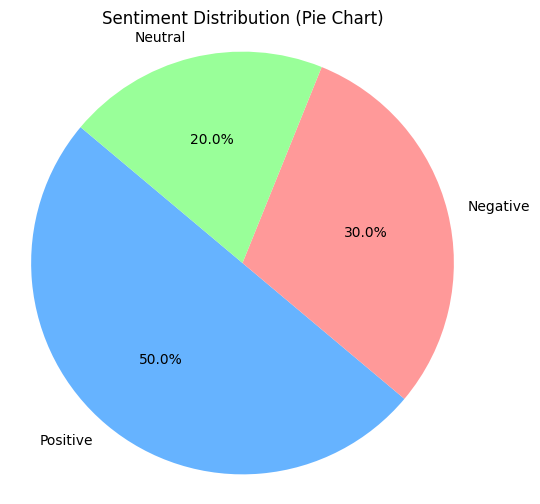

In [29]:
# Count the number of tweets for each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Create a Pie Chart to show sentiment distribution
plt.figure(figsize=(6,6))
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Custom colors for the pie sections

plt.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors,
        autopct='%1.1f%%', startangle=140)

plt.title('Sentiment Distribution (Pie Chart)')
plt.axis('equal')  # Ensures the pie is drawn as a perfect circle
plt.show()


In [30]:
import matplotlib.pyplot as plt


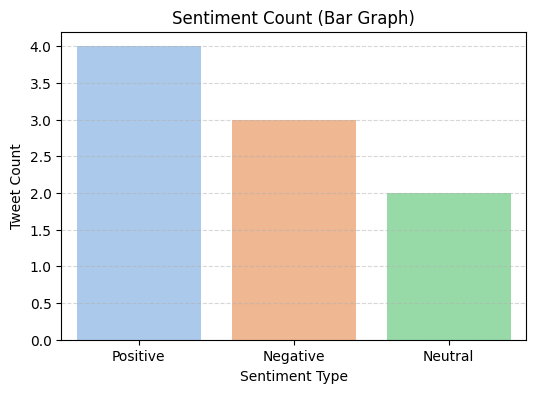

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample sentiment data
data = {
    'sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Positive', 'Neutral', 'Positive', 'Negative']
}

# Create DataFrame
df = pd.DataFrame(data)

# Bar Chart to show sentiment count
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', hue='sentiment', data=df, palette='pastel', legend=False)

plt.title('Sentiment Count (Bar Graph)')
plt.xlabel('Sentiment Type')
plt.ylabel('Tweet Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [33]:
import pandas as pd

# Sample data
data = {
    'sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral'],
    'cleaned_text': [
        'I love this product',
        'This is terrible',
        'It is okay',
        'Amazing service and support',
        'Worst experience ever',
        'Nothing special'
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Join all tweets by sentiment
positive_tweets = " ".join(df[df['sentiment'] == 'Positive']['cleaned_text'])
negative_tweets = " ".join(df[df['sentiment'] == 'Negative']['cleaned_text'])
neutral_tweets = " ".join(df[df['sentiment'] == 'Neutral']['cleaned_text'])

# Print the joined tweets
print("Positive Tweets:", positive_tweets)
print("Negative Tweets:", negative_tweets)
print("Neutral Tweets:", neutral_tweets)


Positive Tweets: I love this product Amazing service and support
Negative Tweets: This is terrible Worst experience ever
Neutral Tweets: It is okay Nothing special


In [34]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()


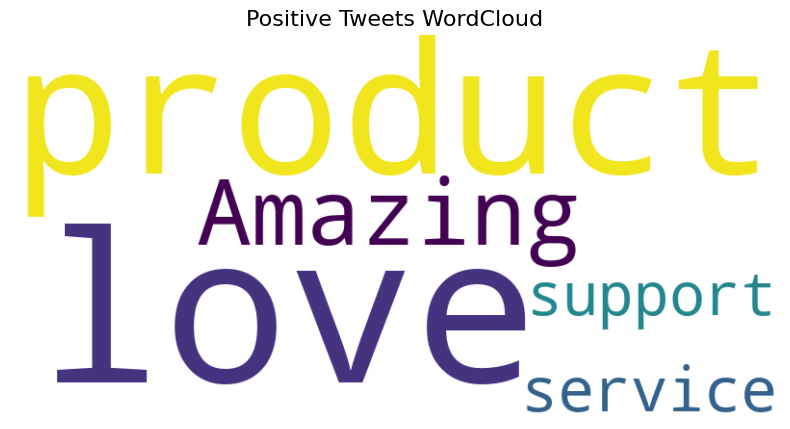

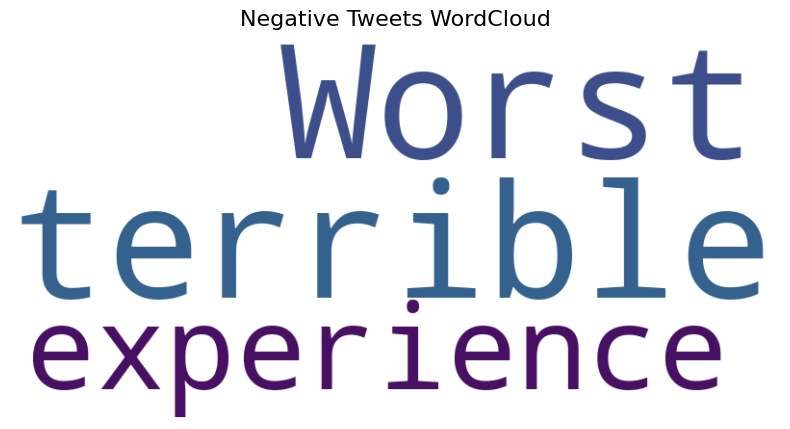

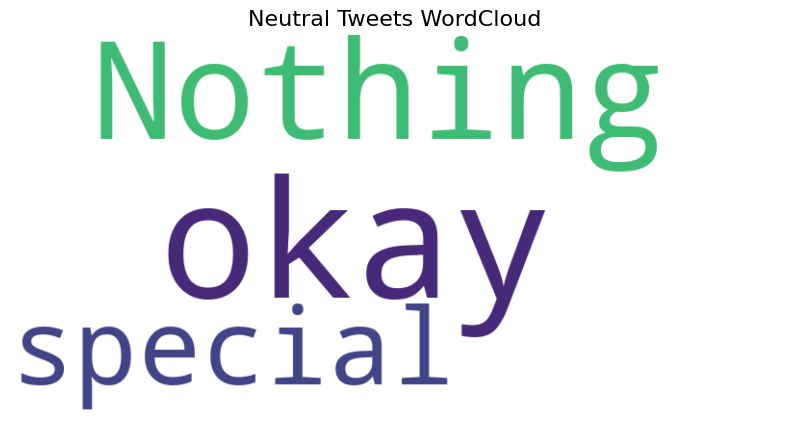

In [35]:
generate_wordcloud(positive_tweets, "Positive Tweets WordCloud")
generate_wordcloud(negative_tweets, "Negative Tweets WordCloud")
generate_wordcloud(neutral_tweets, "Neutral Tweets WordCloud")


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [37]:
# Use cleaned text as input features
X = df['cleaned_text']

# Use sentiment labels as target values
y = df['sentiment']

# Create a TF-IDF vectorizer object
vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF feature vectors
X_vectorized = vectorizer.fit_transform(X)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized, y, test_size=0.2, random_state=42)


In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [40]:
# Predict the sentiment labels for the test data
y_pred = model.predict(X_test)

# Calculate and print accuracy score
print("🔍 Accuracy Score:", accuracy_score(y_test, y_pred))

# Print detailed classification report
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))


🔍 Accuracy Score: 0.0

📋 Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       1.0
     Neutral       0.00      0.00      0.00       0.0
    Positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



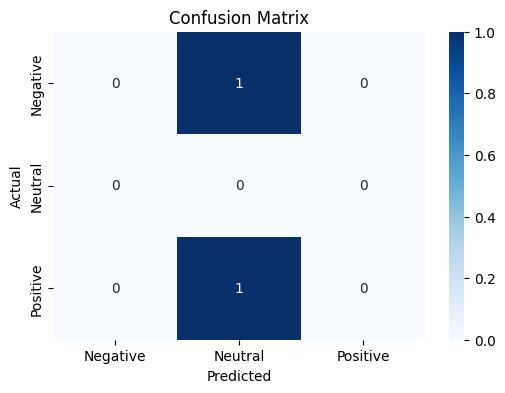

In [41]:
cm = confusion_matrix(y_test, y_pred)

# Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [42]:
import joblib  # For saving and loading machine learning models



In [43]:
# Save the trained model to a file
joblib.dump(model, 'sentiment_model.pkl')

# Save the TF-IDF vectorizer to a file
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("✅ Model and Vectorizer have been saved successfully.")


✅ Model and Vectorizer have been saved successfully.


In [44]:
def predict_sentiment(text):
    # Load the saved model and vectorizer
    model = joblib.load('sentiment_model.pkl')
    vectorizer = joblib.load('tfidf_vectorizer.pkl')
    
    # Clean the input text (convert to lowercase)
    text_cleaned = text.lower()
    
    # Transform the cleaned text using the vectorizer
    vectorized_input = vectorizer.transform([text_cleaned])
    
    # Predict sentiment label
    prediction = model.predict(vectorized_input)
    
    return prediction[0]


In [45]:
# Test Example 1
text1 = "I absolutely love the new iPhone update!"
print("Tweet:", text1)
print("Predicted Sentiment:", predict_sentiment(text1))

# Test Example 2
text2 = "This service is terrible and disappointing."
print("\nTweet:", text2)
print("Predicted Sentiment:", predict_sentiment(text2))


Tweet: I absolutely love the new iPhone update!
Predicted Sentiment: Neutral

Tweet: This service is terrible and disappointing.
Predicted Sentiment: Neutral


In [46]:
df['sentiment'].value_counts()


sentiment
Positive    2
Negative    2
Neutral     2
Name: count, dtype: int64

In [47]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"
